In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Loading data and selecting features

### Import Data

In [2]:
X_train = pd.read_csv('X_train_loan_data.csv', index_col = 0)
X_test = pd.read_csv('X_test_loan_data.csv', index_col = 0)
y_train = pd.read_csv('y_train_loan_data.csv', index_col = 0)
y_test = pd.read_csv('y_test_loan_data.csv', index_col = 0)

### Bird Eye View

In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((373028, 315), (93257, 315), (373028, 1), (93257, 1))

In [4]:
X_train.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:22.4-35,dti:>35,mths_since_last_record_factor,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,0,0,NaN,1,0,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,NaN,1,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,NaN,1,0,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,NaN,1,0,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,1,0,NaN,1,0,0,0,0,0,0


In [5]:
y_train.head()

,good_bad
427211,0
206088,0
136020,0
412305,1
36159,1


In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((373028, 315), (373028, 1), (93257, 315), (93257, 1))

### Selecting the Features

In [7]:
X_train.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [8]:
inputs_train_with_ref_cat = X_train.loc[: , 
['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:Rent_Other_None_Any',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length_int:0',
'emp_length_int:1',
'emp_length_int:2-4',
'emp_length_int:5-6',
'emp_length_int:7-9',
'emp_length_int:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'month_since_earliest_cr_line:<140',
'month_since_earliest_cr_line:141-164',
'month_since_earliest_cr_line:165-247',
'month_since_earliest_cr_line:248-270',
'month_since_earliest_cr_line:271-352',
'month_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
# 'total_rev_hi_lim:<=5K',
# 'total_rev_hi_lim:5K-10K',
# 'total_rev_hi_lim:10K-20K',
# 'total_rev_hi_lim:20K-30K',
# 'total_rev_hi_lim:30K-40K',
# 'total_rev_hi_lim:40K-55K',
# 'total_rev_hi_lim:55K-95K',
# 'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86'
]]

In [9]:
X_train.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [10]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = [
        'grade:G',
        'home_ownership:Rent_Other_None_Any',
        'addr_state:ND_NE_IA_NV_FL_HI_AL',
        'verification_status:Verified',
        'purpose:educ__sm_b__wedd__ren_en__mov__house',
        'initial_list_status:f',
        'term:60',
        'emp_length_int:0',
        'mths_since_issue_d:>84',
        'int_rate:>20.281',
        'month_since_earliest_cr_line:<140',
        'delinq_2yrs:>=4',
        'inq_last_6mths:>6',
        'open_acc:0',
        'pub_rec:0-2',
        'total_acc:<=27',
        'acc_now_delinq:0',
        #'total_rev_hi_lim:<=5K',
        'annual_inc:<20K',
        'dti:>35',
        'mths_since_last_delinq:0-3',
        'mths_since_last_record:0-2']

In [11]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)

In [12]:
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,True,False,False,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
206088,False,False,True,False,False,False,False,True,0,False,...,0,1,0,0,1,0,0,0,0,0
136020,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
412305,False,False,False,True,False,False,False,False,0,False,...,0,1,0,0,1,0,0,0,0,0
36159,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0


## Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [14]:
reg = LogisticRegression()

In [15]:
pd.options.display.max_rows = None

In [16]:
reg.fit(inputs_train, y_train)

LogisticRegression()

In [17]:
reg.intercept_

array([1.27301157])

In [18]:
reg.coef_

array([[-1.14800275e+00, -8.93113996e-01, -6.95932708e-01,
        -5.07146351e-01, -3.26236067e-01, -1.34849589e-01,
        -9.36622765e-02, -1.08381501e-01, -2.97695401e-02,
        -5.67954992e-02, -5.64945952e-02, -6.07150524e-02,
        -7.61111085e-02, -1.33074577e-01, -9.81060376e-02,
        -1.81464288e-01, -2.21943960e-01, -2.19518171e-01,
        -2.60214027e-01, -3.17697492e-01, -5.13647192e-01,
        -8.54243061e-02,  1.17554362e-02, -3.05857497e-01,
        -2.01957189e-01, -2.14490249e-01, -2.67367733e-01,
        -5.44569848e-02, -7.68339133e-02, -1.01510847e-01,
        -1.26336964e-01, -9.08969997e-02, -6.10808501e-02,
        -1.24650207e-01, -1.08379731e+00, -8.82489216e-01,
        -7.81009232e-01, -5.79162189e-01, -4.15636733e-01,
        -1.70760898e-01,  7.11501051e-02, -8.65203872e-01,
        -5.47099635e-01, -2.96271701e-01, -1.06468202e-01,
        -5.77472213e-02, -4.10439357e-02, -8.58607003e-02,
        -1.27222329e-01, -1.37311712e-01, -7.31645321e-0

In [19]:
feature_names = inputs_train.columns.values

In [20]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_names)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,1.273012
1,grade:A,-1.148003
2,grade:B,-0.893114
3,grade:C,-0.695933
4,grade:D,-0.507146
5,grade:E,-0.326236
6,grade:F,-0.134850
7,home_ownership:OWN,-0.093662
8,home_ownership:MORTGAGE,-0.108382
9,addr_state:NM_VA,-0.029770


In [21]:
import numpy as np
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self, *args, **kwargs):
        self.model = linear_model.LogisticRegression(*args, **kwargs)
    
    def fit(self, X, y, batch_size=1000):
        # Ensure X is a numpy array with float64 type
        X = np.asarray(X, dtype=np.float64)
        y = np.asarray(y, dtype=np.float64)
        
        self.model.fit(X, y)
        
        p = X.shape[1]  # Number of features
        F_ij = np.zeros((p, p), dtype=np.float64)  # Fisher Information Matrix
        
        num_samples = X.shape[0]
        for start in range(0, num_samples, batch_size):
            end = min(start + batch_size, num_samples)
            X_batch = X[start:end]
            
            # Ensure batch is also float64
            X_batch = np.asarray(X_batch, dtype=np.float64)
            
            decision_function_batch = self.model.decision_function(X_batch)
            
            # Compute probabilities for batch
            exp_df_batch = np.exp(-decision_function_batch)
            prob_batch = exp_df_batch / (1 + exp_df_batch)**2
            prob_batch = np.reshape(prob_batch, (X_batch.shape[0], 1))
            W_batch = np.diagflat(prob_batch)
            
            # Compute XtW for the current batch and update Fisher Information Matrix
            XtW_batch = np.dot(X_batch.T, W_batch)
            F_ij += np.dot(XtW_batch, X_batch)
        
        # Inverse Fisher Information Matrix
        try:
            Cramer_Rao = np.linalg.inv(F_ij)
        except np.linalg.LinAlgError:
            # Use pseudoinverse if the matrix is singular
            Cramer_Rao = np.linalg.pinv(F_ij)
        
        # Standard errors of the coefficients
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        
        # Z-scores
        z_scores = self.model.coef_[0] / sigma_estimates
        
        # Two-tailed p-values
        p_values = [stat.norm.sf(abs(z)) * 2 for z in z_scores]
        
        # Store results
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [22]:
reg = LogisticRegression_with_p_values()

In [23]:
reg.fit(inputs_train, y_train)

In [24]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_names)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,1.273012
1,grade:A,-1.148003
2,grade:B,-0.893114
3,grade:C,-0.695933
4,grade:D,-0.507146
5,grade:E,-0.326236
6,grade:F,-0.134850
7,home_ownership:OWN,-0.093662
8,home_ownership:MORTGAGE,-0.108382
9,addr_state:NM_VA,-0.029770


In [25]:
p_values = reg.p_values

In [26]:
p_values = np.append(np.nan, np.array(p_values))

In [27]:
summary_table['p_values'] = p_values

In [28]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,1.273012,NaN
1,grade:A,-1.148003,1.065326e-36
2,grade:B,-0.893114,2.966130e-48
3,grade:C,-0.695933,1.363036e-34
4,grade:D,-0.507146,4.803552e-21
5,grade:E,-0.326236,1.290381e-11
6,grade:F,-0.134850,7.272640e-03
7,home_ownership:OWN,-0.093662,3.375168e-06
8,home_ownership:MORTGAGE,-0.108382,1.293150e-17
9,addr_state:NM_VA,-0.029770,3.528258e-01


In [29]:
summary_table['is_significant_5'] = summary_table['p_values'].apply(lambda x: 'Yes' if x < 0.05 else 'No')
summary_table['is_significant_10'] = summary_table['p_values'].apply(lambda x: 'Yes' if x < 0.10 else 'No')

In [30]:
summary_table

,Feature name,Coefficients,p_values,is_significant_5,is_significant_10
0,Intercept,1.273012,NaN,No,No
1,grade:A,-1.148003,1.065326e-36,Yes,Yes
2,grade:B,-0.893114,2.966130e-48,Yes,Yes
3,grade:C,-0.695933,1.363036e-34,Yes,Yes
4,grade:D,-0.507146,4.803552e-21,Yes,Yes
5,grade:E,-0.326236,1.290381e-11,Yes,Yes
6,grade:F,-0.134850,7.272640e-03,Yes,Yes
7,home_ownership:OWN,-0.093662,3.375168e-06,Yes,Yes
8,home_ownership:MORTGAGE,-0.108382,1.293150e-17,Yes,Yes
9,addr_state:NM_VA,-0.029770,3.528258e-01,No,No


In [31]:
#remove: delinq_2yrs, open_acc, dti

In [32]:
inputs_train_with_ref_cat = X_train.loc[: , 
['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:Rent_Other_None_Any',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length_int:0',
'emp_length_int:1',
'emp_length_int:2-4',
'emp_length_int:5-6',
'emp_length_int:7-9',
'emp_length_int:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'month_since_earliest_cr_line:<140',
'month_since_earliest_cr_line:141-164',
'month_since_earliest_cr_line:165-247',
'month_since_earliest_cr_line:248-270',
'month_since_earliest_cr_line:271-352',
'month_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86'
]]

In [33]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = [
        'grade:G',
        'home_ownership:Rent_Other_None_Any',
        'addr_state:ND_NE_IA_NV_FL_HI_AL',
        'verification_status:Verified',
        'purpose:educ__sm_b__wedd__ren_en__mov__house',
        'initial_list_status:f',
        'term:60',
        'emp_length_int:0',
        'mths_since_issue_d:>84',
        'int_rate:>20.281',
        'month_since_earliest_cr_line:<140',
        'inq_last_6mths:>6',
        'pub_rec:0-2',
        'total_acc:<=27',
        'acc_now_delinq:0',
        'annual_inc:<20K',
        'mths_since_last_delinq:0-3',
        'mths_since_last_record:0-2']

In [34]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,True,False,False,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
206088,False,False,True,False,False,False,False,True,0,False,...,0,1,0,0,1,0,0,0,0,0
136020,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
412305,False,False,False,True,False,False,False,False,0,False,...,0,1,0,0,1,0,0,0,0,0
36159,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0


In [35]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, y_train)

In [36]:
feature_names = inputs_train.columns.values

In [37]:
summary_table2 = pd.DataFrame(columns = ['Feature name'], data = feature_names)
summary_table2['Coefficients'] = np.transpose(reg2.coef_)
summary_table2.index = summary_table2.index + 1
summary_table2.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table2 = summary_table2.sort_index()
summary_table2

,Feature name,Coefficients
0,Intercept,1.212707
1,grade:A,-1.166196
2,grade:B,-0.912312
3,grade:C,-0.714916
4,grade:D,-0.522305
5,grade:E,-0.342130
6,grade:F,-0.151317
7,home_ownership:OWN,-0.090704
8,home_ownership:MORTGAGE,-0.106988
9,addr_state:NM_VA,-0.035653


In [38]:
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table2['p_values'] = p_values
summary_table2['is_significant_5'] = summary_table2['p_values'].apply(lambda x: 'Yes' if x < 0.05 else 'No')
summary_table2['is_significant_10'] = summary_table2['p_values'].apply(lambda x: 'Yes' if x < 0.10 else 'No')
summary_table2

,Feature name,Coefficients,p_values,is_significant_5,is_significant_10
0,Intercept,1.212707,NaN,No,No
1,grade:A,-1.166196,6.553767e-38,Yes,Yes
2,grade:B,-0.912312,6.951200e-51,Yes,Yes
3,grade:C,-0.714916,4.677256e-37,Yes,Yes
4,grade:D,-0.522305,8.923671e-23,Yes,Yes
5,grade:E,-0.342130,3.121615e-13,Yes,Yes
6,grade:F,-0.151317,1.898971e-03,Yes,Yes
7,home_ownership:OWN,-0.090704,6.666737e-06,Yes,Yes
8,home_ownership:MORTGAGE,-0.106988,2.951338e-17,Yes,Yes
9,addr_state:NM_VA,-0.035653,2.654436e-01,No,No


In [39]:
#remove: pub_rec, acc_now_delinq

In [40]:
inputs_train_with_ref_cat = X_train.loc[: , 
['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:Rent_Other_None_Any',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length_int:0',
'emp_length_int:1',
'emp_length_int:2-4',
'emp_length_int:5-6',
'emp_length_int:7-9',
'emp_length_int:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'month_since_earliest_cr_line:<140',
'month_since_earliest_cr_line:141-164',
'month_since_earliest_cr_line:165-247',
'month_since_earliest_cr_line:248-270',
'month_since_earliest_cr_line:271-352',
'month_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86'
]]

In [41]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = [
        'grade:G',
        'home_ownership:Rent_Other_None_Any',
        'addr_state:ND_NE_IA_NV_FL_HI_AL',
        'verification_status:Verified',
        'purpose:educ__sm_b__wedd__ren_en__mov__house',
        'initial_list_status:f',
        'term:60',
        'emp_length_int:0',
        'mths_since_issue_d:>84',
        'int_rate:>20.281',
        'month_since_earliest_cr_line:<140',
        'inq_last_6mths:>6',
        'total_acc:<=27',
        'annual_inc:<20K',
        'mths_since_last_delinq:0-3',
        'mths_since_last_record:0-2']

In [42]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,True,False,False,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
206088,False,False,True,False,False,False,False,True,0,False,...,0,1,0,0,1,0,0,0,0,0
136020,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
412305,False,False,False,True,False,False,False,False,0,False,...,0,1,0,0,1,0,0,0,0,0
36159,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0


In [43]:
reg3 = LogisticRegression_with_p_values()
reg3.fit(inputs_train, y_train)
feature_names = inputs_train.columns.values
summary_table3 = pd.DataFrame(columns = ['Feature name'], data = feature_names)
summary_table3['Coefficients'] = np.transpose(reg3.coef_)
summary_table3.index = summary_table3.index + 1
summary_table3.loc[0] = ['Intercept', reg3.intercept_[0]]
summary_table3 = summary_table3.sort_index()
p_values = reg3.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table3['p_values'] = p_values
summary_table3['is_significant_5'] = summary_table3['p_values'].apply(lambda x: 'Yes' if x < 0.05 else 'No')
summary_table3['is_significant_10'] = summary_table3['p_values'].apply(lambda x: 'Yes' if x < 0.10 else 'No')

In [44]:
summary_table3

,Feature name,Coefficients,p_values,is_significant_5,is_significant_10
0,Intercept,1.155690,NaN,No,No
1,grade:A,-1.157895,2.315094e-37,Yes,Yes
2,grade:B,-0.906948,2.703974e-50,Yes,Yes
3,grade:C,-0.709850,1.531332e-36,Yes,Yes
4,grade:D,-0.518060,2.016328e-22,Yes,Yes
5,grade:E,-0.338627,5.502198e-13,Yes,Yes
6,grade:F,-0.149205,2.203161e-03,Yes,Yes
7,home_ownership:OWN,-0.091044,6.161415e-06,Yes,Yes
8,home_ownership:MORTGAGE,-0.106837,3.233307e-17,Yes,Yes
9,addr_state:NM_VA,-0.033262,2.988125e-01,No,No


In [46]:
#Saving the model
import pickle
pickle.dump(reg3, open('pd_model.sav', 'wb'))

### PD Model Validation

### Out-of-sample validation

In [532]:
inputs_test_with_ref_cat = X_test.loc[:,[
'grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:Rent_Other_None_Any',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length_int:0',
'emp_length_int:1',
'emp_length_int:2-4',
'emp_length_int:5-6',
'emp_length_int:7-9',
'emp_length_int:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'month_since_earliest_cr_line:<140',
'month_since_earliest_cr_line:141-164',
'month_since_earliest_cr_line:165-247',
'month_since_earliest_cr_line:248-270',
'month_since_earliest_cr_line:271-352',
'month_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86'
]]

In [533]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = [
        'grade:G',
        'home_ownership:Rent_Other_None_Any',
        'addr_state:ND_NE_IA_NV_FL_HI_AL',
        'verification_status:Verified',
        'purpose:educ__sm_b__wedd__ren_en__mov__house',
        'initial_list_status:f',
        'term:60',
        'emp_length_int:0',
        'mths_since_issue_d:>84',
        'int_rate:>20.281',
        'month_since_earliest_cr_line:<140',
        'inq_last_6mths:>6',
        'total_acc:<=27',
        'annual_inc:<20K',
        'mths_since_last_delinq:0-3',
        'mths_since_last_record:0-2']

In [534]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)

In [535]:
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,month_since_earliest_cr_line:141-164,month_since_earliest_cr_line:165-247,month_since_earliest_cr_line:248-270,month_since_earliest_cr_line:271-352,month_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,total_acc:28-51,total_acc:>=52,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,False,False,True,False,False,False,False,True,0,False,0,True,0,0,0,0,0,False,0,0,0,False,False,False,False,0,1,False,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
288564,False,False,False,False,True,False,False,True,0,False,0,False,0,0,1,0,0,False,0,0,0,False,False,True,False,0,0,True,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
213591,False,False,True,False,False,False,False,True,0,False,0,False,1,0,0,0,0,False,0,0,0,False,False,False,True,0,0,False,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
263083,False,False,True,False,False,False,False,True,0,False,0,False,0,1,0,0,0,False,0,0,0,False,True,False,True,0,0,True,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
165001,True,False,False,False,False,False,False,True,0,False,0,False,0,1,0,0,0,False,0,0,0,False,False,False,True,0,0,False,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [536]:
#takes 0.5 as default threshold for good/bad
y_hat_test = reg3.model.predict(inputs_test)

In [537]:
y_hat_test

array([0., 0., 0., ..., 0., 0., 0.])

In [538]:
#probbaility of good/bas
y_hat_test_prob = reg3.model.predict_proba(inputs_test)
y_hat_test_prob

array([[0.9159208 , 0.0840792 ],
       [0.85735506, 0.14264494],
       [0.88442908, 0.11557092],
       ...,
       [0.97059218, 0.02940782],
       [0.95776096, 0.04223904],
       [0.95410161, 0.04589839]])

In [539]:
y_hat_test_prob_good = y_hat_test_prob[:][:,0]
y_hat_test_prob_good

array([0.9159208 , 0.85735506, 0.88442908, ..., 0.97059218, 0.95776096,
       0.95410161])

In [540]:
y_test_temp = y_test

In [541]:
y_test_temp.reset_index(drop = True, inplace = True)

In [542]:
df_actual_predicted_prob = pd.concat([y_test_temp,pd.DataFrame(y_hat_test_prob_good)], axis = 1)

In [543]:
df_actual_predicted_prob.shape

(93257, 2)

In [544]:
df_actual_predicted_prob.columns = ['y_test', 'y_hat_test_prob_good']

In [545]:
df_actual_predicted_prob.index = X_test.index

In [546]:
df_actual_predicted_prob.head()

,y_test,y_hat_test_prob_good
362514,0,0.915921
288564,0,0.857355
213591,0,0.884429
263083,0,0.938049
165001,0,0.965819


### Accuracy and Area under the curve

In [547]:
#threshold
#Iteration 1
#tr = 0.5

#Iteration 1
tr = 0.9

In [548]:
df_actual_predicted_prob['y_hat_test'] = np.where(df_actual_predicted_prob['y_hat_test_prob_good'] > tr, 0, 1)

In [549]:
df_actual_predicted_prob.head()

,y_test,y_hat_test_prob_good,y_hat_test
362514,0,0.915921,0
288564,0,0.857355,1
213591,0,0.884429,1
263083,0,0.938049,0
165001,0,0.965819,0


In [550]:
pd.crosstab(df_actual_predicted_prob['y_test'],df_actual_predicted_prob['y_hat_test'], 
            rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,47033,36034
1,2816,7374


In [551]:
#Confusion matrix
confusion_matrix = pd.crosstab(df_actual_predicted_prob['y_test'],df_actual_predicted_prob['y_hat_test'], 
            rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_prob.shape[0]
confusion_matrix

Predicted,0,1
Actual,,
0,0.504337,0.386395
1,0.030196,0.079072


In [552]:
accuracy_score = confusion_matrix.iloc[0,0] + confusion_matrix.iloc[1,1]

In [553]:
accuracy_score

0.5834092883107971

In [554]:
#A lot of false positives are there in Iterartion 1
#Changing threshold to 0.9 -- more conservative

In [555]:
#In iteration 2, true positive has reduced

In [556]:
from sklearn.metrics import roc_curve, roc_auc_score

In [557]:
roc_curve(df_actual_predicted_prob['y_test'],df_actual_predicted_prob['y_hat_test'])

(array([0.        , 0.43379441, 1.        ]),
 array([0.        , 0.72365064, 1.        ]),
 array([2, 1, 0]))

In [558]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_prob['y_test'],df_actual_predicted_prob['y_hat_test_prob_good'])

Text(0.5, 1.0, 'ROC curve')

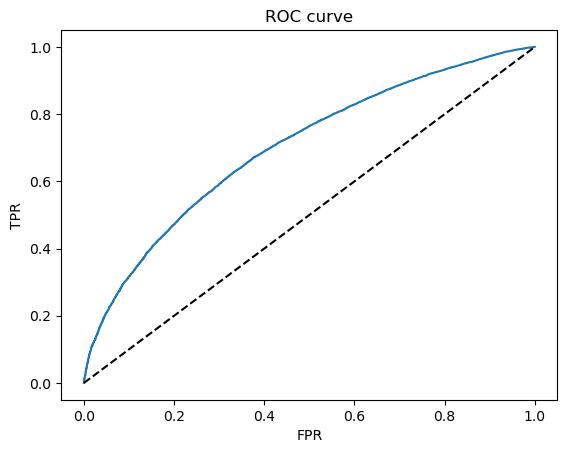

In [559]:
plt.plot(tpr, fpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [560]:
AUCROC = roc_auc_score(df_actual_predicted_prob['y_test'],1-df_actual_predicted_prob['y_hat_test_prob_good'])
AUCROC

0.7006944049905776

### Gini and Kolmogorov-Smirnov 

In [561]:
df_actual_predicted_prob = df_actual_predicted_prob.sort_values('y_hat_test_prob_good')

In [562]:
df_actual_predicted_prob.head()

,y_test,y_hat_test_prob_good,y_hat_test
42341,0,0.392416,1
42344,0,0.421176,1
39810,1,0.429748,1
42396,1,0.444117,1
12074,1,0.467366,1


In [563]:
df_actual_predicted_prob = df_actual_predicted_prob.reset_index()
df_actual_predicted_prob.head()

,index,y_test,y_hat_test_prob_good,y_hat_test
0,42341,0,0.392416,1
1,42344,0,0.421176,1
2,39810,1,0.429748,1
3,42396,1,0.444117,1
4,12074,1,0.467366,1


In [564]:
df_actual_predicted_prob['Cumm Population'] = df_actual_predicted_prob.index + 1
df_actual_predicted_prob['Cumm Bad'] =  df_actual_predicted_prob['y_test'].cumsum()
df_actual_predicted_prob['Cumm Good'] = df_actual_predicted_prob['Cumm Population'] - df_actual_predicted_prob['y_test'].cumsum()

In [565]:
df_actual_predicted_prob.head()

,index,y_test,y_hat_test_prob_good,y_hat_test,Cumm Population,Cumm Bad,Cumm Good
0,42341,0,0.392416,1,1,0,1
1,42344,0,0.421176,1,2,0,2
2,39810,1,0.429748,1,3,1,2
3,42396,1,0.444117,1,4,2,2
4,12074,1,0.467366,1,5,3,2


In [566]:
df_actual_predicted_prob['Cumm perc population'] = df_actual_predicted_prob['Cumm Population'] / df_actual_predicted_prob.shape[0]
df_actual_predicted_prob['Cumm perc good'] = df_actual_predicted_prob['Cumm Good'] / (df_actual_predicted_prob.shape[0] - df_actual_predicted_prob['y_test'].sum())
df_actual_predicted_prob['Cumm perc bad'] = df_actual_predicted_prob['Cumm Bad'] / df_actual_predicted_prob['y_test'].sum()

In [567]:
df_actual_predicted_prob.head()

,index,y_test,y_hat_test_prob_good,y_hat_test,Cumm Population,Cumm Bad,Cumm Good,Cumm perc population,Cumm perc good,Cumm perc bad
0,42341,0,0.392416,1,1,0,1,0.000011,0.000012,0.000000
1,42344,0,0.421176,1,2,0,2,0.000021,0.000024,0.000000
2,39810,1,0.429748,1,3,1,2,0.000032,0.000024,0.000098
3,42396,1,0.444117,1,4,2,2,0.000043,0.000024,0.000196
4,12074,1,0.467366,1,5,3,2,0.000054,0.000024,0.000294


Text(0.5, 1.0, 'Gini')

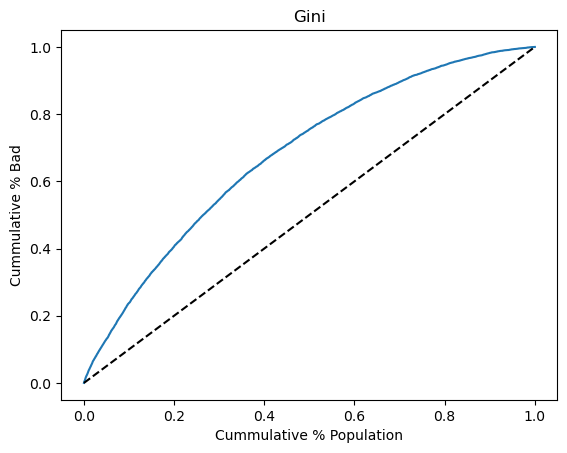

In [568]:
#Gini coefficient
plt.plot(df_actual_predicted_prob['Cumm perc population'], df_actual_predicted_prob['Cumm perc bad'])
plt.plot(df_actual_predicted_prob['Cumm perc population'], df_actual_predicted_prob['Cumm perc population'], linestyle = '--', color = 'k')
plt.xlabel('Cummulative % Population')
plt.ylabel('Cummulative % Bad')
plt.title('Gini')

In [569]:
gini = 2*AUCROC - 1
gini

0.4013888099811551

In [570]:
#Kolmogorov-Smirnov

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

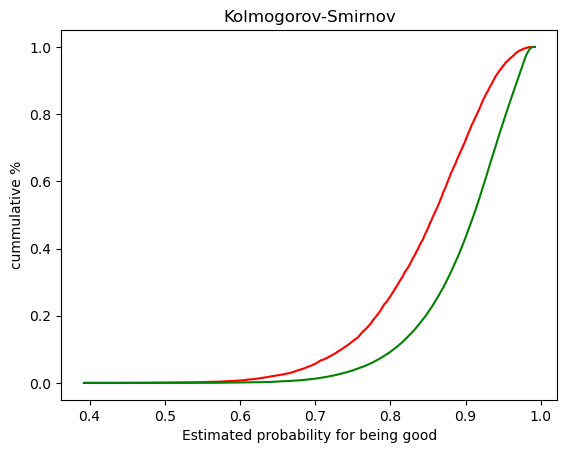

In [571]:
plt.plot(df_actual_predicted_prob['y_hat_test_prob_good'],df_actual_predicted_prob['Cumm perc bad'], color = 'r')
plt.plot(df_actual_predicted_prob['y_hat_test_prob_good'],df_actual_predicted_prob['Cumm perc good'], color = 'g')
plt.xlabel('Estimated probability for being good')
plt.ylabel('cummulative %')
plt.title('Kolmogorov-Smirnov')

In [572]:
KS = max(df_actual_predicted_prob['Cumm perc bad'] - df_actual_predicted_prob['Cumm perc good'])
KS

0.2953838355509823

### Applying PD Model

In [573]:
pd.options.display.max_columns = None

In [574]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:Rent_Other_None_Any,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length_int:0,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,month_since_earliest_cr_line:<140,month_since_earliest_cr_line:141-164,month_since_earliest_cr_line:165-247,month_since_earliest_cr_line:248-270,month_since_earliest_cr_line:271-352,month_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,total_acc:<=27,total_acc:28-51,total_acc:>=52,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,False,False,True,False,False,False,False,False,False,True,0,0,False,0,True,0,0,0,0,0,False,0,0,0,False,False,True,0,False,False,0,1,True,False,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,False,False,False,False,True,False,False,False,False,True,0,0,False,0,False,0,0,1,0,0,False,0,0,0,False,False,True,0,True,False,0,0,False,True,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,False,False,True,False,False,False,False,False,False,True,0,0,False,0,False,1,0,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
263083,False,False,True,False,False,False,False,False,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,True,False,0,False,True,0,0,False,True,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,True,False,False,False,False,False,False,False,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [575]:
summary_table3

,Feature name,Coefficients,p_values,is_significant_5,is_significant_10
0,Intercept,1.155690,NaN,No,No
1,grade:A,-1.157895,2.315094e-37,Yes,Yes
2,grade:B,-0.906948,2.703974e-50,Yes,Yes
3,grade:C,-0.709850,1.531332e-36,Yes,Yes
4,grade:D,-0.518060,2.016328e-22,Yes,Yes
5,grade:E,-0.338627,5.502198e-13,Yes,Yes
6,grade:F,-0.149205,2.203161e-03,Yes,Yes
7,home_ownership:OWN,-0.091044,6.161415e-06,Yes,Yes
8,home_ownership:MORTGAGE,-0.106837,3.233307e-17,Yes,Yes
9,addr_state:NM_VA,-0.033262,2.988125e-01,No,No


In [576]:
y_hat_test_prob_good

array([0.9159208 , 0.85735506, 0.88442908, ..., 0.97059218, 0.95776096,
       0.95410161])

### Creating a Scorecard

In [577]:
ref_categories

['grade:G',
 'home_ownership:Rent_Other_None_Any',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length_int:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'month_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'total_acc:<=27',
 'annual_inc:<20K',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [578]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories['is_significant_5'] = np.nan	
df_ref_categories['is_significant_10'] = np.nan

In [579]:
df_scorecard = pd.concat([summary_table3, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature name,Coefficients,p_values,is_significant_5,is_significant_10
0,0,Intercept,1.155690,NaN,No,No
1,1,grade:A,-1.157895,2.315094e-37,Yes,Yes
2,2,grade:B,-0.906948,2.703974e-50,Yes,Yes
3,3,grade:C,-0.709850,1.531332e-36,Yes,Yes
4,4,grade:D,-0.518060,2.016328e-22,Yes,Yes
5,5,grade:E,-0.338627,5.502198e-13,Yes,Yes
6,6,grade:F,-0.149205,2.203161e-03,Yes,Yes
7,7,home_ownership:OWN,-0.091044,6.161415e-06,Yes,Yes
8,8,home_ownership:MORTGAGE,-0.106837,3.233307e-17,Yes,Yes
9,9,addr_state:NM_VA,-0.033262,2.988125e-01,No,No


In [580]:
df_scorecard['Original_independent_variable'] = df_scorecard['Feature name'].str.split(':').str[0]

In [581]:
df_scorecard

,index,Feature name,Coefficients,p_values,is_significant_5,is_significant_10,Original_independent_variable
0,0,Intercept,1.155690,NaN,No,No,Intercept
1,1,grade:A,-1.157895,2.315094e-37,Yes,Yes,grade
2,2,grade:B,-0.906948,2.703974e-50,Yes,Yes,grade
3,3,grade:C,-0.709850,1.531332e-36,Yes,Yes,grade
4,4,grade:D,-0.518060,2.016328e-22,Yes,Yes,grade
5,5,grade:E,-0.338627,5.502198e-13,Yes,Yes,grade
6,6,grade:F,-0.149205,2.203161e-03,Yes,Yes,grade
7,7,home_ownership:OWN,-0.091044,6.161415e-06,Yes,Yes,home_ownership
8,8,home_ownership:MORTGAGE,-0.106837,3.233307e-17,Yes,Yes,home_ownership
9,9,addr_state:NM_VA,-0.033262,2.988125e-01,No,No,addr_state


In [582]:
min_score = 300
max_score = 850

In [583]:
df_scorecard.groupby('Original_independent_variable')['Coefficients'].max()

Original_independent_variable
Intercept                       1.155690
addr_state                      0.000000
annual_inc                      0.086149
emp_length_int                  0.000000
grade                           0.000000
home_ownership                  0.000000
initial_list_status             0.000000
inq_last_6mths                  0.000000
int_rate                        0.000000
month_since_earliest_cr_line    0.000000
mths_since_issue_d              0.084674
mths_since_last_delinq          0.000000
mths_since_last_record          0.000000
purpose                         0.000000
term                            0.000000
total_acc                       0.077193
verification_status             0.000000
Name: Coefficients, dtype: float64

In [584]:
max_sum_coef = df_scorecard.groupby('Original_independent_variable')['Coefficients'].max().sum()
max_sum_coef

1.4037051495284427

In [585]:
df_scorecard.groupby('Original_independent_variable')['Coefficients'].min()

Original_independent_variable
Intercept                       1.155690
addr_state                     -0.512567
annual_inc                     -0.648658
emp_length_int                 -0.118189
grade                          -1.157895
home_ownership                 -0.106837
initial_list_status            -0.054202
inq_last_6mths                 -0.679426
int_rate                       -0.914559
month_since_earliest_cr_line   -0.106383
mths_since_issue_d             -1.020475
mths_since_last_delinq         -0.127596
mths_since_last_record         -0.599140
purpose                        -0.263708
term                           -0.076747
total_acc                       0.000000
verification_status            -0.108953
Name: Coefficients, dtype: float64

In [586]:
min_sum_coef = df_scorecard.groupby('Original_independent_variable')['Coefficients'].min().sum()
min_sum_coef

-5.339644591271545

In [587]:
df_scorecard['Score calculation'] = (-1)*df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard

,index,Feature name,Coefficients,p_values,is_significant_5,is_significant_10,Original_independent_variable,Score calculation
0,0,Intercept,1.155690,NaN,No,No,Intercept,-94.260161
1,1,grade:A,-1.157895,2.315094e-37,Yes,Yes,grade,94.440057
2,2,grade:B,-0.906948,2.703974e-50,Yes,Yes,grade,73.972353
3,3,grade:C,-0.709850,1.531332e-36,Yes,Yes,grade,57.896634
4,4,grade:D,-0.518060,2.016328e-22,Yes,Yes,grade,42.253891
5,5,grade:E,-0.338627,5.502198e-13,Yes,Yes,grade,27.619080
6,6,grade:F,-0.149205,2.203161e-03,Yes,Yes,grade,12.169408
7,7,home_ownership:OWN,-0.091044,6.161415e-06,Yes,Yes,home_ownership,7.425717
8,8,home_ownership:MORTGAGE,-0.106837,3.233307e-17,Yes,Yes,home_ownership,8.713815
9,9,addr_state:NM_VA,-0.033262,2.988125e-01,No,No,addr_state,2.712890


In [588]:
#intercept score
df_scorecard['Score calculation'][0] = ((df_scorecard['Coefficients'][0] - max_sum_coef) / (min_sum_coef - max_sum_coef)) * (max_score - min_score) + min_score

In [589]:
df_scorecard

,index,Feature name,Coefficients,p_values,is_significant_5,is_significant_10,Original_independent_variable,Score calculation
0,0,Intercept,1.155690,NaN,No,No,Intercept,320.228611
1,1,grade:A,-1.157895,2.315094e-37,Yes,Yes,grade,94.440057
2,2,grade:B,-0.906948,2.703974e-50,Yes,Yes,grade,73.972353
3,3,grade:C,-0.709850,1.531332e-36,Yes,Yes,grade,57.896634
4,4,grade:D,-0.518060,2.016328e-22,Yes,Yes,grade,42.253891
5,5,grade:E,-0.338627,5.502198e-13,Yes,Yes,grade,27.619080
6,6,grade:F,-0.149205,2.203161e-03,Yes,Yes,grade,12.169408
7,7,home_ownership:OWN,-0.091044,6.161415e-06,Yes,Yes,home_ownership,7.425717
8,8,home_ownership:MORTGAGE,-0.106837,3.233307e-17,Yes,Yes,home_ownership,8.713815
9,9,addr_state:NM_VA,-0.033262,2.988125e-01,No,No,addr_state,2.712890


In [590]:
df_scorecard['Credit Score'] = df_scorecard['Score calculation'].round()
df_scorecard

,index,Feature name,Coefficients,p_values,is_significant_5,is_significant_10,Original_independent_variable,Score calculation,Credit Score
0,0,Intercept,1.155690,NaN,No,No,Intercept,320.228611,320.0
1,1,grade:A,-1.157895,2.315094e-37,Yes,Yes,grade,94.440057,94.0
2,2,grade:B,-0.906948,2.703974e-50,Yes,Yes,grade,73.972353,74.0
3,3,grade:C,-0.709850,1.531332e-36,Yes,Yes,grade,57.896634,58.0
4,4,grade:D,-0.518060,2.016328e-22,Yes,Yes,grade,42.253891,42.0
5,5,grade:E,-0.338627,5.502198e-13,Yes,Yes,grade,27.619080,28.0
6,6,grade:F,-0.149205,2.203161e-03,Yes,Yes,grade,12.169408,12.0
7,7,home_ownership:OWN,-0.091044,6.161415e-06,Yes,Yes,home_ownership,7.425717,7.0
8,8,home_ownership:MORTGAGE,-0.106837,3.233307e-17,Yes,Yes,home_ownership,8.713815,9.0
9,9,addr_state:NM_VA,-0.033262,2.988125e-01,No,No,addr_state,2.712890,3.0


In [591]:
min_sum_score = df_scorecard.groupby('Original_independent_variable')['Credit Score'].min().sum()
max_sum_score = df_scorecard.groupby('Original_independent_variable')['Credit Score'].max().sum()
min_sum_score, max_sum_score

(300.0, 850.0)

### Calculating Credit Score

In [592]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:Rent_Other_None_Any,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length_int:0,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,month_since_earliest_cr_line:<140,month_since_earliest_cr_line:141-164,month_since_earliest_cr_line:165-247,month_since_earliest_cr_line:248-270,month_since_earliest_cr_line:271-352,month_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,total_acc:<=27,total_acc:28-51,total_acc:>=52,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,False,False,True,False,False,False,False,False,False,True,0,0,False,0,True,0,0,0,0,0,False,0,0,0,False,False,True,0,False,False,0,1,True,False,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,False,False,False,False,True,False,False,False,False,True,0,0,False,0,False,0,0,1,0,0,False,0,0,0,False,False,True,0,True,False,0,0,False,True,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,False,False,True,False,False,False,False,False,False,True,0,0,False,0,False,1,0,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
263083,False,False,True,False,False,False,False,False,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,True,False,0,False,True,0,0,False,True,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,True,False,False,False,False,False,False,False,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [593]:
df_scorecard

,index,Feature name,Coefficients,p_values,is_significant_5,is_significant_10,Original_independent_variable,Score calculation,Credit Score
0,0,Intercept,1.155690,NaN,No,No,Intercept,320.228611,320.0
1,1,grade:A,-1.157895,2.315094e-37,Yes,Yes,grade,94.440057,94.0
2,2,grade:B,-0.906948,2.703974e-50,Yes,Yes,grade,73.972353,74.0
3,3,grade:C,-0.709850,1.531332e-36,Yes,Yes,grade,57.896634,58.0
4,4,grade:D,-0.518060,2.016328e-22,Yes,Yes,grade,42.253891,42.0
5,5,grade:E,-0.338627,5.502198e-13,Yes,Yes,grade,27.619080,28.0
6,6,grade:F,-0.149205,2.203161e-03,Yes,Yes,grade,12.169408,12.0
7,7,home_ownership:OWN,-0.091044,6.161415e-06,Yes,Yes,home_ownership,7.425717,7.0
8,8,home_ownership:MORTGAGE,-0.106837,3.233307e-17,Yes,Yes,home_ownership,8.713815,9.0
9,9,addr_state:NM_VA,-0.033262,2.988125e-01,No,No,addr_state,2.712890,3.0


In [594]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [595]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [596]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:Rent_Other_None_Any,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length_int:0,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,month_since_earliest_cr_line:<140,month_since_earliest_cr_line:141-164,month_since_earliest_cr_line:165-247,month_since_earliest_cr_line:248-270,month_since_earliest_cr_line:271-352,month_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,total_acc:<=27,total_acc:28-51,total_acc:>=52,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,1,False,False,True,False,False,False,False,False,False,True,0,0,False,0,True,0,0,0,0,0,False,0,0,0,False,False,True,0,False,False,0,1,True,False,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,1,False,False,False,False,True,False,False,False,False,True,0,0,False,0,False,0,0,1,0,0,False,0,0,0,False,False,True,0,True,False,0,0,False,True,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,1,False,False,True,False,False,False,False,False,False,True,0,0,False,0,False,1,0,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
263083,1,False,False,True,False,False,False,False,False,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,True,False,0,False,True,0,0,False,True,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,True,False,False,False,False,False,False,False,False,True,0,0,False,0,False,0,1,0,0,0,False,0,0,0,False,False,True,0,False,True,0,0,True,False,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [597]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [598]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length_int:1,emp_length_int:2-4,emp_length_int:5-6,emp_length_int:7-9,emp_length_int:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,month_since_earliest_cr_line:141-164,month_since_earliest_cr_line:165-247,month_since_earliest_cr_line:248-270,month_since_earliest_cr_line:271-352,month_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,total_acc:28-51,total_acc:>=52,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,grade:G,home_ownership:Rent_Other_None_Any,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,initial_list_status:f,term:60,emp_length_int:0,mths_since_issue_d:>84,int_rate:>20.281,month_since_earliest_cr_line:<140,inq_last_6mths:>6,total_acc:<=27,annual_inc:<20K,mths_since_last_delinq:0-3,mths_since_last_record:0-2
362514,1,False,False,True,False,False,False,False,True,0,False,0,True,0,0,0,0,0,False,0,0,0,False,False,False,False,0,1,False,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,False,False,0,True,0,True,1,1,0,0,0,0,1,0,0,0
288564,1,False,False,False,False,True,False,False,True,0,False,0,False,0,0,1,0,0,False,0,0,0,False,False,True,False,0,0,True,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,False,False,0,True,0,False,1,0,0,1,0,0,0,0,1,0
213591,1,False,False,True,False,False,False,False,True,0,False,0,False,1,0,0,0,0,False,0,0,0,False,False,False,True,0,0,False,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,False,False,0,True,0,True,0,0,0,0,0,0,0,0,0,0
263083,1,False,False,True,False,False,False,False,True,0,False,0,False,0,1,0,0,0,False,0,0,0,False,True,False,True,0,0,True,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,False,False,0,False,0,False,1,0,0,0,1,0,0,0,0,0
165001,1,True,False,False,False,False,False,False,True,0,False,0,False,0,1,0,0,0,False,0,0,0,False,False,False,True,0,0,False,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,False,False,0,True,0,True,0,0,0,0,0,0,1,0,0,0


In [599]:
scorecard_scores = df_scorecard['Credit Score']

In [600]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 93)

In [601]:
scorecard_scores.shape

(93,)

In [602]:
scorecard_scores = scorecard_scores.values.reshape(93,1)
scorecard_scores.shape

(93, 1)

In [603]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)
y_scores.head()

,0
362514,609.0
288564,562.0
213591,581.0
263083,636.0
165001,686.0


### From Credit Score to PD

In [604]:
sum_coef_from_score = ((y_scores - max_score) / (max_score - min_score)) * (min_sum_coef - max_sum_coef) + min_sum_coef

In [605]:
sum_coef_from_score = pd.to_numeric(sum_coef_from_score.iloc[:,0])

In [606]:
y_hat_prob_from_score = 1 - (np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1))

In [607]:
#PD
y_hat_prob_from_score.head()

362514    0.915663
288564    0.859190
213591    0.885089
263083    0.937957
165001    0.965407
Name: 0, dtype: float64

In [608]:
y_hat_test_prob_good[0:5]

array([0.9159208 , 0.85735506, 0.88442908, 0.9380486 , 0.96581916])

### Setting cut-offs from score

Text(0.5, 1.0, 'ROC curve')

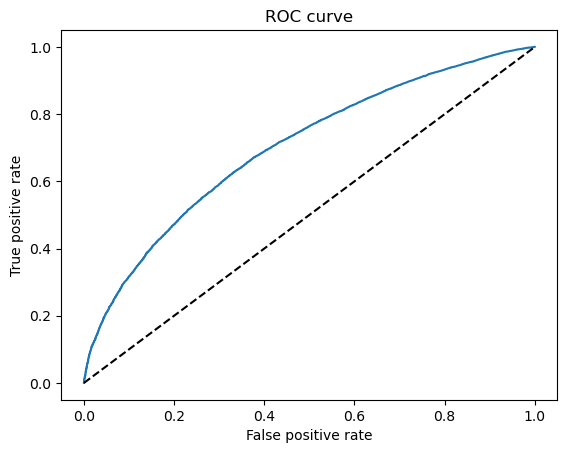

In [609]:
plt.plot(tpr, fpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [610]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)

In [611]:
df_cutoffs.columns = ['thresholds', 'tpr', 'fpr']

In [612]:
df_cutoffs.head()

,thresholds,tpr,fpr
0,1.992065,0.000000,0.000000
1,0.992065,0.000012,0.000000
2,0.989162,0.000470,0.000000
3,0.989160,0.000470,0.000098
4,0.988676,0.000722,0.000098


In [613]:
# Let the first threshold (the value of the thresholds column with index 0) be equal to a number, very close to 1
# but smaller than 1, say 1 - 1 / 10 ^ 16.
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)

In [614]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) + max_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()

In [615]:
df_cutoffs.head()

,thresholds,tpr,fpr,Score
0,1.000000,0.000000,0.000000,2156.0
1,0.992065,0.000012,0.000000,808.0
2,0.989162,0.000470,0.000000,783.0
3,0.989160,0.000470,0.000098,783.0
4,0.988676,0.000722,0.000098,779.0


In [616]:
#Maximum score on first row
df_cutoffs['Score'][0] = max_score

In [617]:
df_cutoffs.head()

,thresholds,tpr,fpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.992065,0.000012,0.000000,808.0
2,0.989162,0.000470,0.000000,783.0
3,0.989160,0.000470,0.000098,783.0
4,0.988676,0.000722,0.000098,779.0


In [630]:
#Approval and rejection rate for each possible cutoff
# We define a function called 'n_approved' which assigns a value of 1 if a predicted probability is greater than the parameter p, 
#which is a threshold, and a value of 0, if it is not. Then it sums the column. Thus, if given any percentage values, the function will return
#the number of rows wih estimated probabilites greater than the threshold. 
def n_rejected(p):
    return np.where(df_actual_predicted_prob['y_hat_test_prob_good'] >= p, 0, 1).sum()

In [637]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_rejected)
df_cutoffs['N Rejected'] = df_actual_predicted_prob['y_hat_test_prob_good'].shape[0] - df_cutoffs['N Rejected']
df_cutoffs['Rejection rate'] = df_cutoffs['N Rejected'] / df_actual_predicted_prob['y_hat_test_prob_good'].shape[0]
df_cutoffs['Approval rate'] = 1 - df_cutoffs['Rejection rate']

In [638]:
df_cutoffs.head()

,thresholds,tpr,fpr,Score,N Approved,N Rejected,Rejection rate,Approval rate
0,1.000000,0.000000,0.000000,850.0,93257,0,0.000000,1.000000
1,0.992065,0.000012,0.000000,808.0,93256,1,0.000011,0.999989
2,0.989162,0.000470,0.000000,783.0,93218,39,0.000418,0.999582
3,0.989160,0.000470,0.000098,783.0,93217,40,0.000429,0.999571
4,0.988676,0.000722,0.000098,779.0,93196,61,0.000654,0.999346


In [639]:
df_cutoffs[(df_cutoffs['thresholds'] > 0.900) & (df_cutoffs['thresholds']< 0.901)]

,thresholds,tpr,fpr,Score,N Approved,N Rejected,Rejection rate,Approval rate
5393,0.900983,0.560511,0.271639,595.0,43929,49328,0.528947,0.471053
5394,0.900983,0.560511,0.271737,595.0,43928,49329,0.528958,0.471042
5395,0.900859,0.561306,0.271737,594.0,43862,49395,0.529665,0.470335
5396,0.900859,0.561306,0.271835,594.0,43861,49396,0.529676,0.470324
5397,0.900857,0.561318,0.271835,594.0,43860,49397,0.529687,0.470313
5398,0.900857,0.561318,0.271933,594.0,43859,49398,0.529698,0.470302
5399,0.900855,0.561330,0.271933,594.0,43858,49399,0.529708,0.470292
5400,0.900853,0.561330,0.272031,594.0,43857,49400,0.529719,0.470281
5401,0.900832,0.561414,0.272031,594.0,43850,49407,0.529794,0.470206
5402,0.900829,0.561414,0.272130,594.0,43849,49408,0.529805,0.470195


In [645]:
df_cutoffs[(df_cutoffs['Approval rate'] > 0.5)]

,thresholds,tpr,fpr,Score,N Approved,N Rejected,Rejection rate,Approval rate
0,1.000000,0.000000,0.000000,850.0,93257,0,0.000000,1.000000
1,0.992065,0.000012,0.000000,808.0,93256,1,0.000011,0.999989
2,0.989162,0.000470,0.000000,783.0,93218,39,0.000418,0.999582
3,0.989160,0.000470,0.000098,783.0,93217,40,0.000429,0.999571
4,0.988676,0.000722,0.000098,779.0,93196,61,0.000654,0.999346
5,0.988669,0.000722,0.000196,779.0,93195,62,0.000665,0.999335
6,0.986592,0.003287,0.000196,765.0,92982,275,0.002949,0.997051
7,0.986587,0.003287,0.000294,765.0,92981,276,0.002960,0.997040
8,0.985676,0.005249,0.000294,760.0,92818,439,0.004707,0.995293
9,0.985674,0.005249,0.000393,760.0,92817,440,0.004718,0.995282


In [640]:
#Index: 5393 - 90% is the cut-off

In [641]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [642]:
df_scorecard.to_csv('df_scorecard.csv')